## CREDIT RISK ASSESSMENT by GEETH & SAIKRISHNA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from pprint import pprint as pp
import csv
from pathlib import Path
import seaborn as sns
from itertools import product
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from pprint import pprint as pp
import csv
from pathlib import Path
import seaborn as sns
from itertools import product
import string



from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import MiniBatchKMeans, DBSCAN
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.datasets import make_classification
import xgboost as xgb
from xgboost import XGBClassifier
 

import warnings
warnings.filterwarnings('ignore')
# from pandas_profiling import ProfileReport
import seaborn as sns
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from pprint import pprint as pp
import csv
from pathlib import Path
import seaborn as sns
from itertools import product
import string
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import MiniBatchKMeans, DBSCAN
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
df = pd.read_excel('Assessment.xlsx')

In [3]:
df.shape

(6000, 19)

In [4]:
df.head()

,cust_id,acc_no,checking_balance,months_loan_duration,credit_history,purpose,amount (USD),savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependants,phone,default
0,6252029,625202900002,< 0 USD,12,good,car,1274,< 100 USD,< 1 year,3,1.0,37,none,own,1,unskilled,1,no,yes
1,5110070,511007000001,1 - 200 USD,36,good,car,12389,unknown,1 - 4 years,1,4.0,37,none,other,1,skilled,1,yes,yes
2,2846491,284649100002,< 0 USD,11,critical,car,3939,< 100 USD,1 - 4 years,1,2.0,40,none,own,2,unskilled,2,no,no
3,9264318,926431800001,1 - 200 USD,15,good,renovations,1308,< 100 USD,> 7 years,4,4.0,38,none,own,2,unskilled,1,no,no
4,9412980,941298000001,unknown,10,good,furniture/appliances,1924,< 100 USD,1 - 4 years,1,4.0,38,none,own,1,skilled,1,yes,no


In [5]:
df.columns  

Index(['cust_id', 'acc_no', 'checking_balance', 'months_loan_duration',
       'credit_history', 'purpose', 'amount (USD)', 'savings_balance',
       'employment_duration', 'percent_of_income', 'years_at_residence', 'age',
       'other_credit', 'housing', 'existing_loans_count', 'job', 'dependants',
       'phone', 'default'],
      dtype='object')

In [6]:
df.info

<bound method DataFrame.info of       cust_id        acc_no checking_balance  months_loan_duration  \
0     6252029  625202900002          < 0 USD                    12   
1     5110070  511007000001      1 - 200 USD                    36   
2     2846491  284649100002          < 0 USD                    11   
3     9264318  926431800001      1 - 200 USD                    15   
4     9412980  941298000001          unknown                    10   
...       ...           ...              ...                   ...   
5995  4373854  437385400001      1 - 200 USD                    42   
5996  7767919  776791900001          unknown                    24   
5997  6491774  649177400004          unknown                    36   
5998  4380622  438062200001          < 0 USD                    36   
5999  6301673  630167300002          < 0 USD                    12   

     credit_history               purpose  amount (USD) savings_balance  \
0              good                   car          1

In [7]:
df.describe

<bound method NDFrame.describe of       cust_id        acc_no checking_balance  months_loan_duration  \
0     6252029  625202900002          < 0 USD                    12   
1     5110070  511007000001      1 - 200 USD                    36   
2     2846491  284649100002          < 0 USD                    11   
3     9264318  926431800001      1 - 200 USD                    15   
4     9412980  941298000001          unknown                    10   
...       ...           ...              ...                   ...   
5995  4373854  437385400001      1 - 200 USD                    42   
5996  7767919  776791900001          unknown                    24   
5997  6491774  649177400004          unknown                    36   
5998  4380622  438062200001          < 0 USD                    36   
5999  6301673  630167300002          < 0 USD                    12   

     credit_history               purpose  amount (USD) savings_balance  \
0              good                   car         

In [8]:
df['target'] = df['default'].apply(lambda x : 1 if x == 'yes' else 0) # Convert to numeric
df = df.drop('default',axis=1)

In [9]:
df['phone'] = df['phone'].replace(['yes','no'],[1,0])

In [10]:
df.head()

,cust_id,acc_no,checking_balance,months_loan_duration,credit_history,purpose,amount (USD),savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependants,phone,target
0,6252029,625202900002,< 0 USD,12,good,car,1274,< 100 USD,< 1 year,3,1.0,37,none,own,1,unskilled,1,0,1
1,5110070,511007000001,1 - 200 USD,36,good,car,12389,unknown,1 - 4 years,1,4.0,37,none,other,1,skilled,1,1,1
2,2846491,284649100002,< 0 USD,11,critical,car,3939,< 100 USD,1 - 4 years,1,2.0,40,none,own,2,unskilled,2,0,0
3,9264318,926431800001,1 - 200 USD,15,good,renovations,1308,< 100 USD,> 7 years,4,4.0,38,none,own,2,unskilled,1,0,0
4,9412980,941298000001,unknown,10,good,furniture/appliances,1924,< 100 USD,1 - 4 years,1,4.0,38,none,own,1,skilled,1,1,0


## WOE & IV

In [11]:
def get_iv(df,feature,target):
    lst = []
    unq_val = df[feature].unique()
    for i in unq_val:
        lst.append([feature, # Feature name
        i, # Value of a feature (unique)
        df[(df[feature] == i) & (df[target] == 0)].count()[feature], # Good (Fraud == 0)
        df[(df[feature] == i) & (df[target] == 1)].count()[feature] # Bad (Fraud == 1)
        ])
    df1 = pd.DataFrame(lst,columns = ['variable','value','good','bad'])    
    total_good = df[df['target'] == 0].count()[feature]
    total_bad = df.shape[0]-total_good
    df1['distribution_good']= df1['good']/total_good
    df1['distribution_bad']= df1['bad']/total_bad
    df1['WOE'] = np.log(df1['distribution_good']/df1['distribution_bad'])
    df1 = df1.replace({'WOE':{np.inf:0,-np.inf:0}})
    df1["IV"] =  df1['WOE']*(df1['distribution_good']- df1['distribution_bad'])
    print(df1)
    print("\n",total_good)
    print("\n",total_bad)
    print("\n",df1['IV'].sum())

In [12]:
get_iv(df,"age","target")
        

   variable  value  good  bad  distribution_good  distribution_bad       WOE  \
0       age     37   126   48           0.030000          0.026667  0.117783   
1       age     40   114   36           0.027143          0.020000  0.305382   
2       age     38   120   24           0.028571          0.013333  0.762140   
3       age     22    96   66           0.022857          0.036667 -0.472604   
4       age     75    12    0           0.002857          0.000000  0.000000   
5       age     24   150  114           0.035714          0.063333 -0.572861   
6       age     39    90   36           0.021429          0.020000  0.068993   
7       age     23   168  120           0.040000          0.066667 -0.510826   
8       age     32   150   54           0.035714          0.030000  0.174353   
9       age     28   168   90           0.040000          0.050000 -0.223144   
10      age     29   132   90           0.031429          0.050000 -0.464306   
11      age     46    84   24           

In [13]:
get_iv(df,'acc_no',"target")

     variable         value  good  bad  distribution_good  distribution_bad  \
0      acc_no  625202900002     0    1           0.000000          0.000556   
1      acc_no  511007000001     0    1           0.000000          0.000556   
2      acc_no  284649100002     1    0           0.000238          0.000000   
3      acc_no  926431800001     1    0           0.000238          0.000000   
4      acc_no  941298000001     1    0           0.000238          0.000000   
...       ...           ...   ...  ...                ...               ...   
5995   acc_no  437385400001     1    0           0.000238          0.000000   
5996   acc_no  776791900001     1    0           0.000238          0.000000   
5997   acc_no  649177400004     0    1           0.000000          0.000556   
5998   acc_no  438062200001     0    1           0.000000          0.000556   
5999   acc_no  630167300002     0    1           0.000000          0.000556   

      WOE   IV  
0     0.0 -0.0  
1     0.0 -0.0  


In [14]:
get_iv(df,'months_loan_duration',"target")

                variable  value  good  bad  distribution_good  \
0   months_loan_duration     12   780  294           0.185714   
1   months_loan_duration     36   276  222           0.065714   
2   months_loan_duration     11    54    0           0.012857   
3   months_loan_duration     15   312   72           0.074286   
4   months_loan_duration     10   150   18           0.035714   
5   months_loan_duration     14    18    6           0.004286   
6   months_loan_duration     24   768  336           0.182857   
7   months_loan_duration     18   426  252           0.101429   
8   months_loan_duration     30   162   78           0.038571   
9   months_loan_duration      6   396   54           0.094286   
10  months_loan_duration      9   210   84           0.050000   
11  months_loan_duration     48   120  168           0.028571   
12  months_loan_duration     13    24    0           0.005714   
13  months_loan_duration      7    30    0           0.007143   
14  months_loan_duration 

In [15]:
get_iv(df,'savings_balance',"target")

          variable           value  good   bad  distribution_good  \
0  savings_balance       < 100 USD  2316  1302           0.551429   
1  savings_balance         unknown   906   192           0.215714   
2  savings_balance   100 - 500 USD   414   204           0.098571   
3  savings_balance      > 1000 USD   252    36           0.060000   
4  savings_balance  500 - 1000 USD   312    66           0.074286   

   distribution_bad       WOE        IV  
0          0.723333 -0.271358  0.046648  
1          0.106667  0.704246  0.076796  
2          0.113333 -0.139552  0.002060  
3          0.020000  1.098612  0.043944  
4          0.036667  0.706051  0.026561  

 4200

 1800

 0.19600955690422672


## EDA using PANDAS PROFILING

In [16]:
from pandas_profiling import ProfileReport

In [17]:
prof = ProfileReport(df)
prof.to_file(output_file='output.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
# Showing the report 
prof

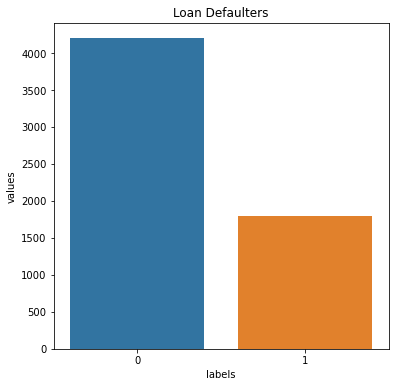

In [19]:
temp = df["target"].value_counts()
df1 = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('Loan Defaulters')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df1)
locs, labels = plt.xticks()
plt.show()

# Missing values

In [20]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [21]:
missing_data(df)

,Total,Percent
years_at_residence,1320,22.0
cust_id,0,0.0
phone,0,0.0
dependants,0,0.0
job,0,0.0
existing_loans_count,0,0.0
housing,0,0.0
other_credit,0,0.0
age,0,0.0
percent_of_income,0,0.0


In [22]:
df.dropna(subset=['years_at_residence'], inplace=True)

## Feature Observation and graph plotting for further Analysis

In [23]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = df[feature].value_counts()
    df2 = pd.DataFrame({feature: temp.index,'Distribution of Loans': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = df[[feature, 'target']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Distribution of Loans",data=df2)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='target', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target prone to defaults [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

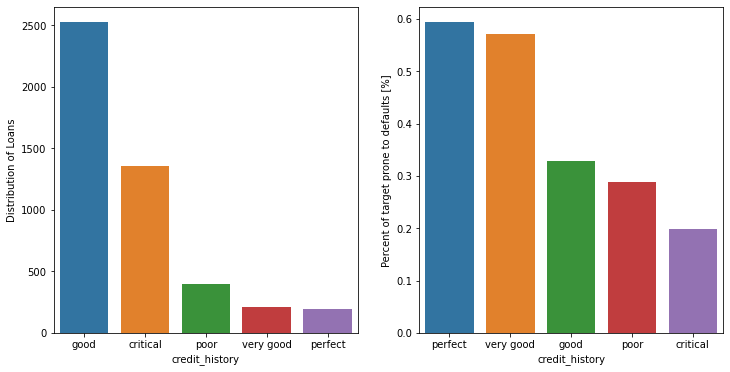

In [24]:
plot_stats('credit_history')

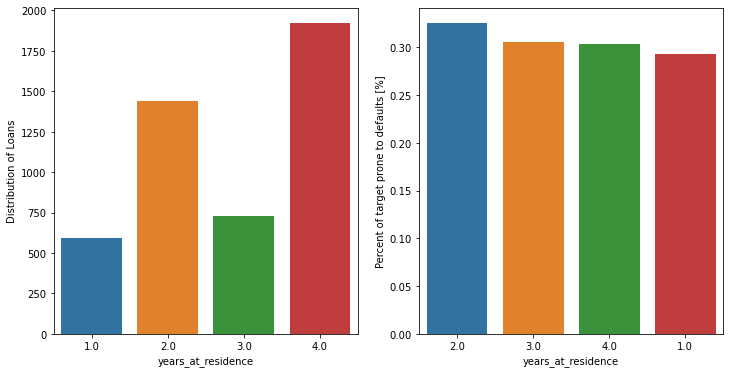

In [25]:
plot_stats('years_at_residence')

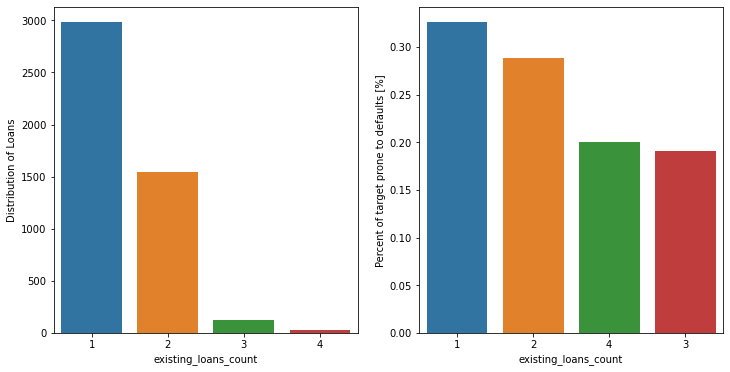

In [26]:
plot_stats('existing_loans_count')

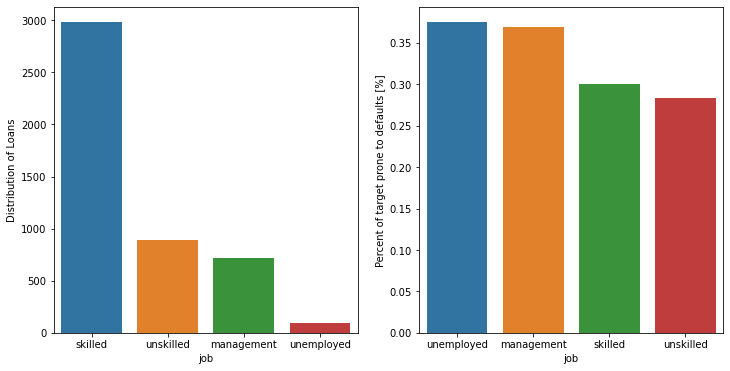

In [27]:
plot_stats('job')

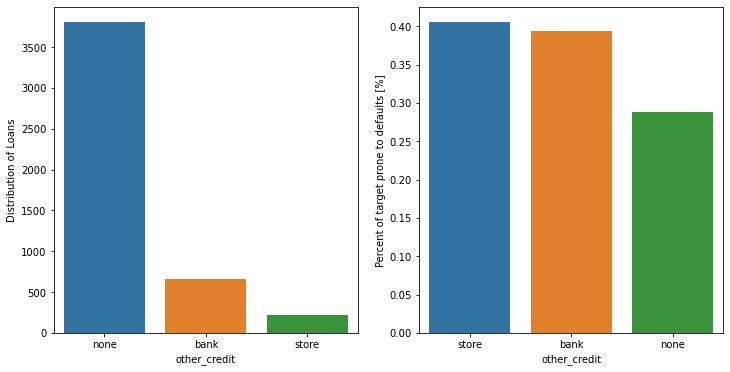

In [28]:
plot_stats('other_credit')

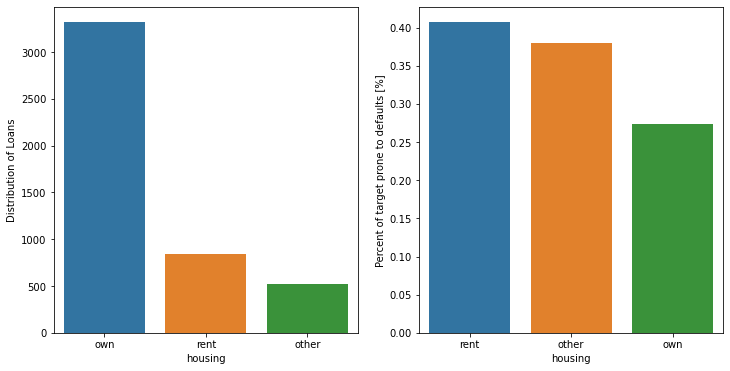

In [29]:
plot_stats('housing')

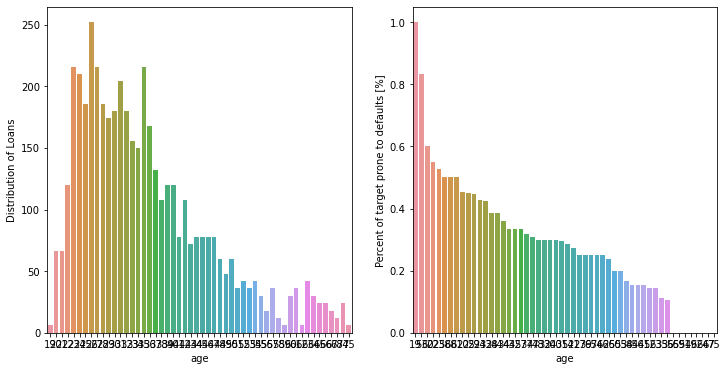

In [30]:
plot_stats('age')

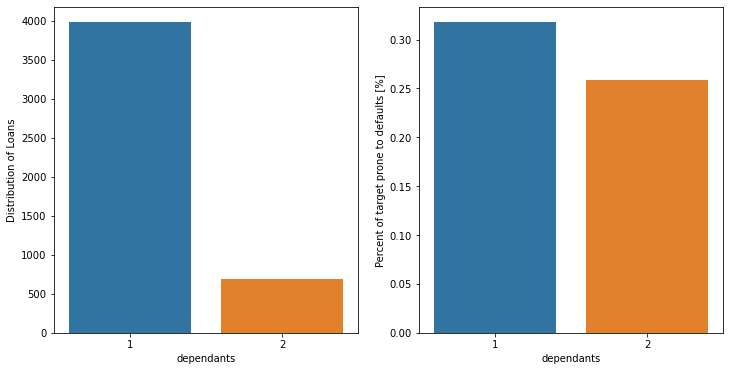

In [31]:
plot_stats('dependants')

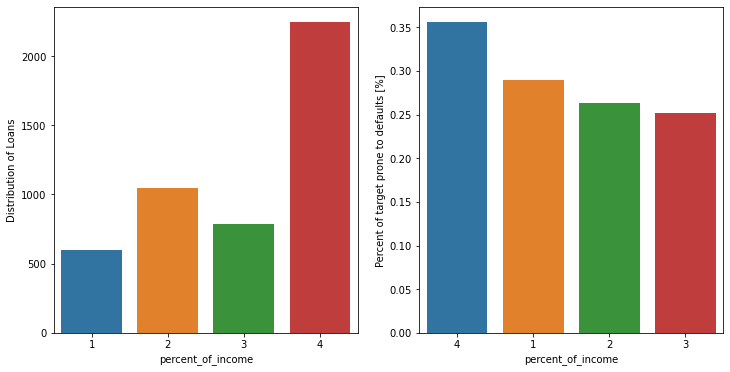

In [32]:
plot_stats('percent_of_income')

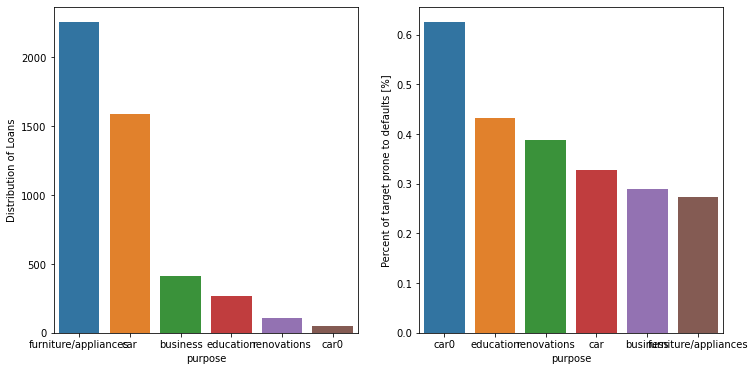

In [33]:
plot_stats('purpose')

In [34]:
# Plot distribution of one feature
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(df[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()  

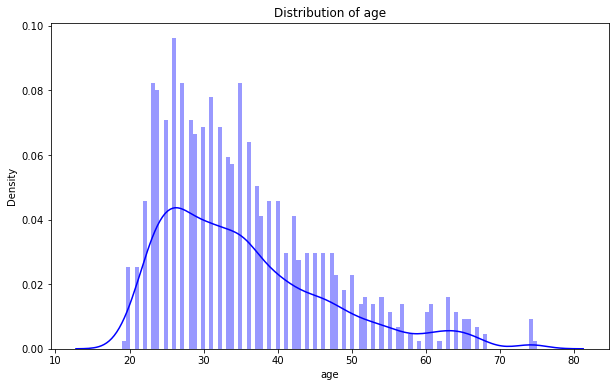

In [35]:
plot_distribution('age','blue')

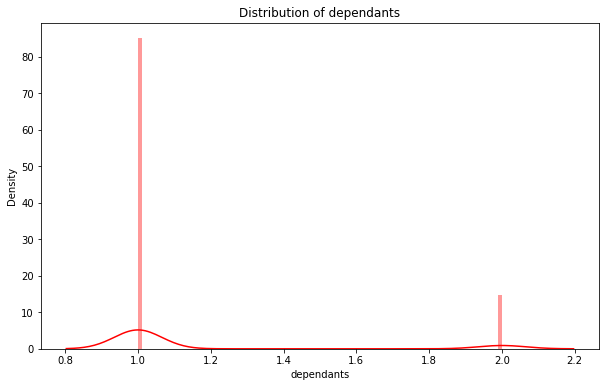

In [36]:
plot_distribution('dependants','red')

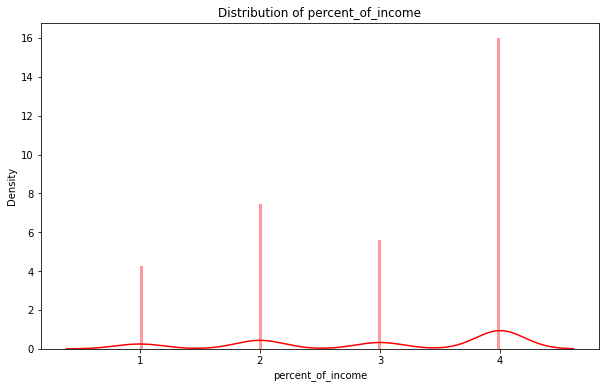

In [37]:
plot_distribution('percent_of_income','red')

## Feature selection using Correlation

In [38]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,cust_id,acc_no,months_loan_duration,amount (USD),percent_of_income,years_at_residence,age,existing_loans_count,dependants,phone,target
cust_id,1.000000,0.999951,-0.035236,-0.031351,-0.017903,0.003934,-0.012841,-0.005626,-0.013593,-0.008183,-0.012407
acc_no,0.999951,1.000000,-0.035009,-0.031098,-0.018157,0.003627,-0.012616,-0.006930,-0.013464,-0.007941,-0.012834
months_loan_duration,-0.035236,-0.035009,1.000000,0.622775,0.072630,0.030536,-0.031360,-0.027386,-0.044311,0.175941,0.192308
amount (USD),-0.031351,-0.031098,0.622775,1.000000,-0.275884,0.034042,0.039674,-0.024590,0.028316,0.313197,0.126749
percent_of_income,-0.017903,-0.018157,0.072630,-0.275884,1.000000,0.012557,0.030390,0.024988,-0.100780,-0.010914,0.073725
years_at_residence,0.003934,0.003627,0.030536,0.034042,0.012557,1.000000,0.261661,0.098284,0.047799,0.107857,-0.006429
age,-0.012841,-0.012616,-0.031360,0.039674,0.030390,0.261661,1.000000,0.156150,0.124728,0.155067,-0.118894
existing_loans_count,-0.005626,-0.006930,-0.027386,-0.024590,0.024988,0.098284,0.156150,1.000000,0.108068,0.042641,-0.057800
dependants,-0.013593,-0.013464,-0.044311,0.028316,-0.100780,0.047799,0.124728,0.108068,1.000000,-0.010297,-0.045548
phone,-0.008183,-0.007941,0.175941,0.313197,-0.010914,0.107857,0.155067,0.042641,-0.010297,1.000000,-0.030583


In [39]:
corr_target = df.corrwith(df['target'],method = 'spearman')

In [40]:
corr_target

cust_id                -0.012547
acc_no                 -0.012547
months_loan_duration    0.192066
amount (USD)            0.053202
percent_of_income       0.081706
years_at_residence     -0.007173
age                    -0.145791
existing_loans_count   -0.052967
dependants             -0.045548
phone                  -0.030583
target                  1.000000
dtype: float64

In [41]:
df.shape

(4680, 19)

In [42]:
df.columns

Index(['cust_id', 'acc_no', 'checking_balance', 'months_loan_duration',
       'credit_history', 'purpose', 'amount (USD)', 'savings_balance',
       'employment_duration', 'percent_of_income', 'years_at_residence', 'age',
       'other_credit', 'housing', 'existing_loans_count', 'job', 'dependants',
       'phone', 'target'],
      dtype='object')

# Dropping columns with high correlation and getting dummies for categorical values

In [43]:
df = df.drop(['months_loan_duration','amount (USD)','percent_of_income'], axis=1)

In [44]:
df.shape

(4680, 16)

In [45]:
df.columns

Index(['cust_id', 'acc_no', 'checking_balance', 'credit_history', 'purpose',
       'savings_balance', 'employment_duration', 'years_at_residence', 'age',
       'other_credit', 'housing', 'existing_loans_count', 'job', 'dependants',
       'phone', 'target'],
      dtype='object')

In [46]:
dff = pd.get_dummies(df, columns = ['checking_balance', 'credit_history', 'purpose',
                                                       'savings_balance', 'employment_duration', 'other_credit',
                                                       'housing', 'job'])

In [47]:
df = df.drop(['checking_balance', 'credit_history', 'purpose',
                                                       'savings_balance', 'employment_duration', 'other_credit',
                                                       'housing', 'job'], axis=1)

In [48]:
df = df.merge(dff, how='left')

In [49]:
df.shape

(4680, 43)

In [50]:
df.head

<bound method NDFrame.head of       cust_id        acc_no  years_at_residence  age  existing_loans_count  \
0     6252029  625202900002                 1.0   37                     1   
1     5110070  511007000001                 4.0   37                     1   
2     2846491  284649100002                 2.0   40                     2   
3     9264318  926431800001                 4.0   38                     2   
4     9412980  941298000001                 4.0   38                     1   
...       ...           ...                 ...  ...                   ...   
4675  7479368  747936800002                 4.0   35                     1   
4676  4527766  452776600002                 4.0   47                     1   
4677  4373854  437385400001                 2.0   55                     1   
4678  6491774  649177400004                 2.0   26                     2   
4679  4380622  438062200001                 4.0   34                     1   

      dependants  phone  target  

## Splitting  of dependent and independent

In [51]:
# Feature matrix #input 
x = df.drop(columns=['target'],axis=1).values  #independent input variable
y = df['target'].values  #output dependent variable


## Defining a function for Model Fitting

In [52]:
# importing libraries for RUC & AUC
from sklearn import metrics
from sklearn.metrics import precision_recall_curve, average_precision_score


In [53]:
def model(x,y,model,ts):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=ts)
    
    model.fit(x_train, y_train)
    
    y_predicted = model.predict(x_test)
    
    model.fit(x_train, y_train)
    
    probs = model.predict_proba(x_test)
    
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()
    
    print(roc_auc_score(y_test,probs[:,1]))
    
    print('Classification report:\n', classification_report(y_test, y_predicted))
    
    conf_mat = confusion_matrix(y_true=y_test, y_pred=y_predicted)
    
    print('Confusion matrix:\n', conf_mat)
    
    print(f'Accuracy Score:\n{accuracy_score(y_test, y_predicted):0.5f}')

In [54]:
m = DecisionTreeClassifier()

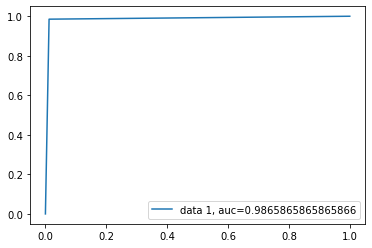

0.9865865865865866
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       666
           1       0.97      0.99      0.98       270

    accuracy                           0.99       936
   macro avg       0.98      0.99      0.98       936
weighted avg       0.99      0.99      0.99       936

Confusion matrix:
 [[657   9]
 [  4 266]]
Accuracy Score:
0.98611


In [55]:
#1
model(x,y,m,0.2)

In [56]:
m = LogisticRegression(penalty = 'l2', solver = 'liblinear',random_state=10)


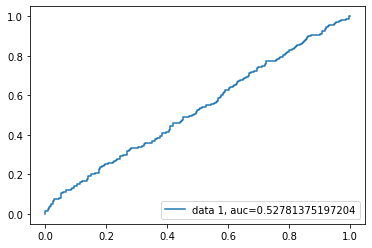

0.52781375197204
Classification report:
               precision    recall  f1-score   support

           0       0.68      1.00      0.81       797
           1       0.00      0.00      0.00       373

    accuracy                           0.68      1170
   macro avg       0.34      0.50      0.41      1170
weighted avg       0.46      0.68      0.55      1170

Confusion matrix:
 [[797   0]
 [373   0]]
Accuracy Score:
0.68120


In [57]:
model(x,y,m,0.25)

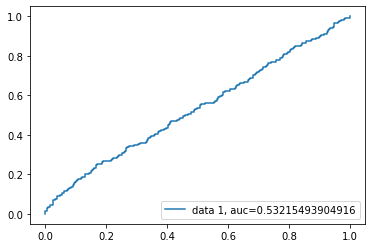

0.53215493904916
Classification report:
               precision    recall  f1-score   support

           0       0.69      1.00      0.82       807
           1       0.00      0.00      0.00       363

    accuracy                           0.69      1170
   macro avg       0.34      0.50      0.41      1170
weighted avg       0.48      0.69      0.56      1170

Confusion matrix:
 [[807   0]
 [363   0]]
Accuracy Score:
0.68974


In [58]:
m = LogisticRegression(penalty = 'l2', solver = 'sag',random_state=10)
model(x,y,m,0.25)

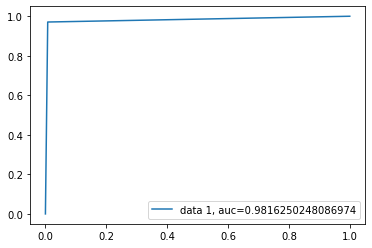

0.9816250248086974
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       662
           1       0.98      0.98      0.98       274

    accuracy                           0.99       936
   macro avg       0.99      0.99      0.99       936
weighted avg       0.99      0.99      0.99       936

Confusion matrix:
 [[657   5]
 [  5 269]]
Accuracy Score:
0.98932


In [59]:
#2
m = DecisionTreeClassifier()
model(x,y,m,0.2)

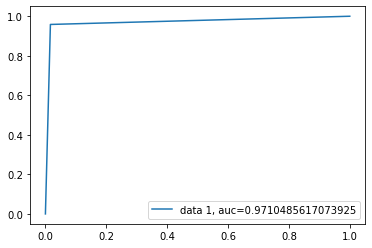

0.9710485617073925
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       671
           1       0.96      0.96      0.96       265

    accuracy                           0.98       936
   macro avg       0.97      0.97      0.97       936
weighted avg       0.98      0.98      0.98       936

Confusion matrix:
 [[660  11]
 [ 11 254]]
Accuracy Score:
0.97650


In [60]:
#3
m = DecisionTreeClassifier(criterion='entropy',random_state=8)
model(x,y,m,0.2)

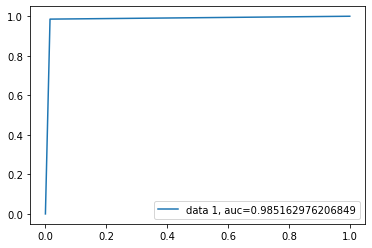

0.985162976206849
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       661
           1       0.96      0.99      0.97       275

    accuracy                           0.99       936
   macro avg       0.98      0.99      0.98       936
weighted avg       0.99      0.99      0.99       936

Confusion matrix:
 [[651  10]
 [  4 271]]
Accuracy Score:
0.98504


In [61]:
#4
m = DecisionTreeClassifier( criterion='gini', splitter='random',random_state=8)
model(x,y,m,0.2)

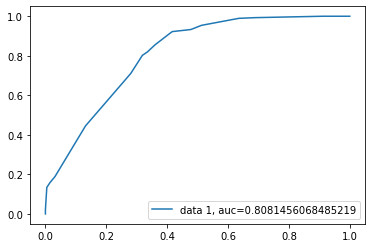

0.8081456068485219
Classification report:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       653
           1       0.59      0.45      0.51       283

    accuracy                           0.74       936
   macro avg       0.69      0.66      0.67       936
weighted avg       0.73      0.74      0.73       936

Confusion matrix:
 [[567  86]
 [157 126]]
Accuracy Score:
0.74038


In [62]:
m = DecisionTreeClassifier( criterion='entropy', splitter='best',max_depth=5,random_state=8)
model(x,y,m,0.2)

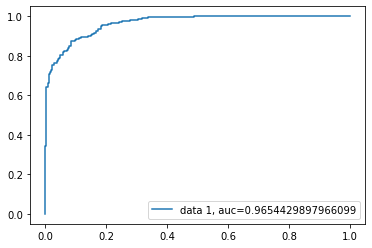

0.9654429897966099
Classification report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       633
           1       0.99      0.63      0.77       303

    accuracy                           0.88       936
   macro avg       0.92      0.81      0.84       936
weighted avg       0.89      0.88      0.87       936

Confusion matrix:
 [[631   2]
 [113 190]]
Accuracy Score:
0.87714


In [63]:
m = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=8, min_samples_split=2,random_state=9)
model(x,y,m,0.2)

## PCA for Dimensionality Reduction 

In [64]:
from sklearn.decomposition import PCA

In [65]:
 def pca_model_results(x, y, model,comp):
    pca = PCA(n_components=comp)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    x_train = pca.fit_transform(x_train)
    x_test = pca.fit_transform(x_test)
    
    print('PCA Explained Variance ratio: ', pca.explained_variance_ratio_)
    
    # fitting the model
    model.fit(x_train, y_train)
    
    # obtaining model predictions from the test data
    y_predicted = model.predict(x_test)
    
    model.fit(x_train, y_train)
    
    probs = model.predict_proba(x_test)
    
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()
    
    print(roc_auc_score(y_test,probs[:,1]))
    
     # printing the classifcation report and confusion matrix
    print('Classification report:\n', classification_report(y_test, y_predicted))
    conf_mat = confusion_matrix(y_true=y_test, y_pred=y_predicted)
    print('Confusion matrix:\n', conf_mat)

PCA Explained Variance ratio:  [1.00000000e+00 1.20892796e-14 1.76206839e-21]


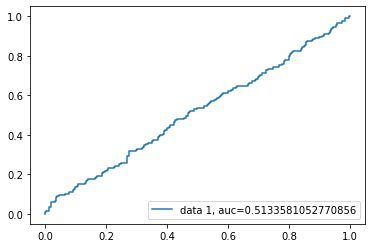

0.5133581052770856
Classification report:
               precision    recall  f1-score   support

           0       0.73      0.51      0.60       662
           1       0.31      0.53      0.39       274

    accuracy                           0.52       936
   macro avg       0.52      0.52      0.50       936
weighted avg       0.60      0.52      0.54       936

Confusion matrix:
 [[338 324]
 [128 146]]


In [66]:
model = LogisticRegression()
pca_model_results(x,y,model,3)

PCA Explained Variance ratio:  [1.00000000e+00 1.21862832e-14 1.82901294e-21]


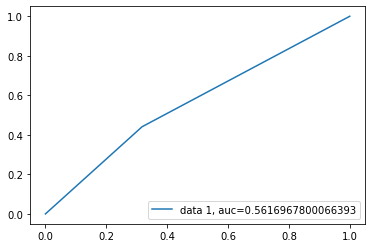

0.5616967800066393
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.69      0.72       639
           1       0.43      0.50      0.46       297

    accuracy                           0.63       936
   macro avg       0.59      0.59      0.59       936
weighted avg       0.65      0.63      0.63       936

Confusion matrix:
 [[438 201]
 [148 149]]


In [67]:
model = DecisionTreeClassifier()
pca_model_results(x,y,model,3)  

In [68]:
from sklearn.naive_bayes import GaussianNB

PCA Explained Variance ratio:  [1.00000000e+00 1.87959771e-21 1.70645115e-23]


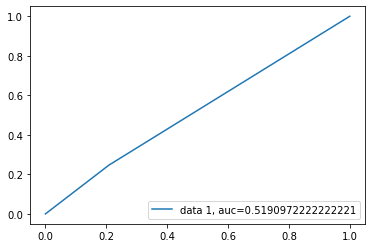

0.5190972222222221
Classification report:
               precision    recall  f1-score   support

           0       0.69      0.91      0.79       648
           1       0.30      0.09      0.14       288

    accuracy                           0.66       936
   macro avg       0.50      0.50      0.46       936
weighted avg       0.57      0.66      0.59       936

Confusion matrix:
 [[588  60]
 [262  26]]


In [69]:
m = GaussianNB()
pca_model_results(x,y,model,3) 

In [70]:
df1 = pd.read_excel('Assessment.xlsx')

In [71]:
df1['target'] = df1['default'].apply(lambda x : 1 if x == 'yes' else 0) # Convert to numeric
df1 = df1.drop('default',axis=1)

In [72]:
df1['phone'] = df1['phone'].replace(['yes','no'],[1,0])

In [73]:
df1.head()

,cust_id,acc_no,checking_balance,months_loan_duration,credit_history,purpose,amount (USD),savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependants,phone,target
0,6252029,625202900002,< 0 USD,12,good,car,1274,< 100 USD,< 1 year,3,1.0,37,none,own,1,unskilled,1,0,1
1,5110070,511007000001,1 - 200 USD,36,good,car,12389,unknown,1 - 4 years,1,4.0,37,none,other,1,skilled,1,1,1
2,2846491,284649100002,< 0 USD,11,critical,car,3939,< 100 USD,1 - 4 years,1,2.0,40,none,own,2,unskilled,2,0,0
3,9264318,926431800001,1 - 200 USD,15,good,renovations,1308,< 100 USD,> 7 years,4,4.0,38,none,own,2,unskilled,1,0,0
4,9412980,941298000001,unknown,10,good,furniture/appliances,1924,< 100 USD,1 - 4 years,1,4.0,38,none,own,1,skilled,1,1,0


In [74]:
df1.columns

Index(['cust_id', 'acc_no', 'checking_balance', 'months_loan_duration',
       'credit_history', 'purpose', 'amount (USD)', 'savings_balance',
       'employment_duration', 'percent_of_income', 'years_at_residence', 'age',
       'other_credit', 'housing', 'existing_loans_count', 'job', 'dependants',
       'phone', 'target'],
      dtype='object')

In [75]:
get_iv(df1,'cust_id','target')

     variable    value  good  bad  distribution_good  distribution_bad  WOE  \
0     cust_id  6252029     0    4           0.000000          0.002222  0.0   
1     cust_id  5110070     0    1           0.000000          0.000556  0.0   
2     cust_id  2846491     4    0           0.000952          0.000000  0.0   
3     cust_id  9264318     1    0           0.000238          0.000000  0.0   
4     cust_id  9412980     1    0           0.000238          0.000000  0.0   
...       ...      ...   ...  ...                ...               ...  ...   
3477  cust_id  7729481     1    0           0.000238          0.000000  0.0   
3478  cust_id  8486642     1    0           0.000238          0.000000  0.0   
3479  cust_id  7381948     0    1           0.000000          0.000556  0.0   
3480  cust_id  7767919     1    0           0.000238          0.000000  0.0   
3481  cust_id  4380622     0    1           0.000000          0.000556  0.0   

       IV  
0    -0.0  
1    -0.0  
2     0.0  
3  

In [76]:
get_iv(df1,'acc_no','target')

     variable         value  good  bad  distribution_good  distribution_bad  \
0      acc_no  625202900002     0    1           0.000000          0.000556   
1      acc_no  511007000001     0    1           0.000000          0.000556   
2      acc_no  284649100002     1    0           0.000238          0.000000   
3      acc_no  926431800001     1    0           0.000238          0.000000   
4      acc_no  941298000001     1    0           0.000238          0.000000   
...       ...           ...   ...  ...                ...               ...   
5995   acc_no  437385400001     1    0           0.000238          0.000000   
5996   acc_no  776791900001     1    0           0.000238          0.000000   
5997   acc_no  649177400004     0    1           0.000000          0.000556   
5998   acc_no  438062200001     0    1           0.000000          0.000556   
5999   acc_no  630167300002     0    1           0.000000          0.000556   

      WOE   IV  
0     0.0 -0.0  
1     0.0 -0.0  


In [77]:
get_iv(df1,'checking_balance','target')

           variable        value  good  bad  distribution_good  \
0  checking_balance      < 0 USD   834  810           0.198571   
1  checking_balance  1 - 200 USD   984  630           0.234286   
2  checking_balance      unknown  2088  276           0.497143   
3  checking_balance    > 200 USD   294   84           0.070000   

   distribution_bad       WOE        IV  
0          0.450000 -0.818099  0.205693  
1          0.350000 -0.401392  0.046447  
2          0.153333  1.176263  0.404410  
3          0.046667  0.405465  0.009461  

 4200

 1800

 0.6660115033513336


In [78]:
get_iv(df1,'months_loan_duration','target')

                variable  value  good  bad  distribution_good  \
0   months_loan_duration     12   780  294           0.185714   
1   months_loan_duration     36   276  222           0.065714   
2   months_loan_duration     11    54    0           0.012857   
3   months_loan_duration     15   312   72           0.074286   
4   months_loan_duration     10   150   18           0.035714   
5   months_loan_duration     14    18    6           0.004286   
6   months_loan_duration     24   768  336           0.182857   
7   months_loan_duration     18   426  252           0.101429   
8   months_loan_duration     30   162   78           0.038571   
9   months_loan_duration      6   396   54           0.094286   
10  months_loan_duration      9   210   84           0.050000   
11  months_loan_duration     48   120  168           0.028571   
12  months_loan_duration     13    24    0           0.005714   
13  months_loan_duration      7    30    0           0.007143   
14  months_loan_duration 

In [79]:
get_iv(df1,'credit_history','target')

         variable      value  good   bad  distribution_good  distribution_bad  \
0  credit_history       good  2166  1014           0.515714          0.563333   
1  credit_history   critical  1458   300           0.347143          0.166667   
2  credit_history  very good   126   168           0.030000          0.093333   
3  credit_history       poor   360   168           0.085714          0.093333   
4  credit_history    perfect    90   150           0.021429          0.083333   

        WOE        IV  
0 -0.088319  0.004206  
1  0.733741  0.132423  
2 -1.134980  0.071882  
3 -0.085158  0.000649  
4 -1.358123  0.084074  

 4200

 1800

 0.2932335473908263


In [80]:
get_iv(df1,'purpose','target')

  variable                 value  good  bad  distribution_good  \
0  purpose                   car  1386  636           0.330000   
1  purpose           renovations    84   48           0.020000   
2  purpose  furniture/appliances  2094  744           0.498571   
3  purpose                  car0    42   30           0.010000   
4  purpose              business   378  204           0.090000   
5  purpose             education   216  138           0.051429   

   distribution_bad       WOE        IV  
0          0.353333 -0.068319  0.001594  
1          0.026667 -0.287682  0.001918  
2          0.413333  0.187492  0.015982  
3          0.016667 -0.510826  0.003406  
4          0.113333 -0.230524  0.005379  
5          0.076667 -0.399273  0.010077  

 4200

 1800

 0.03835478242959107


In [81]:
get_iv(df1,'amount (USD)','target')

         variable  value  good  bad  distribution_good  distribution_bad  \
0    amount (USD)   1274     0    6           0.000000          0.003333   
1    amount (USD)  12389     0    6           0.000000          0.003333   
2    amount (USD)   3939     6    0           0.001429          0.000000   
3    amount (USD)   1308     6    0           0.001429          0.000000   
4    amount (USD)   1924     6    6           0.001429          0.003333   
..            ...    ...   ...  ...                ...               ...   
916  amount (USD)   6304     6    0           0.001429          0.000000   
917  amount (USD)   6568     6    0           0.001429          0.000000   
918  amount (USD)   4473     6    0           0.001429          0.000000   
919  amount (USD)    894     6    0           0.001429          0.000000   
920  amount (USD)   1331     0    6           0.000000          0.003333   

          WOE        IV  
0    0.000000 -0.000000  
1    0.000000 -0.000000  
2    0.00

In [82]:
get_iv(df1,'savings_balance','target')

          variable           value  good   bad  distribution_good  \
0  savings_balance       < 100 USD  2316  1302           0.551429   
1  savings_balance         unknown   906   192           0.215714   
2  savings_balance   100 - 500 USD   414   204           0.098571   
3  savings_balance      > 1000 USD   252    36           0.060000   
4  savings_balance  500 - 1000 USD   312    66           0.074286   

   distribution_bad       WOE        IV  
0          0.723333 -0.271358  0.046648  
1          0.106667  0.704246  0.076796  
2          0.113333 -0.139552  0.002060  
3          0.020000  1.098612  0.043944  
4          0.036667  0.706051  0.026561  

 4200

 1800

 0.19600955690422672


In [83]:
get_iv(df1,'employment_duration','target')

              variable        value  good  bad  distribution_good  \
0  employment_duration     < 1 year   612  420           0.145714   
1  employment_duration  1 - 4 years  1410  624           0.335714   
2  employment_duration    > 7 years  1134  384           0.270000   
3  employment_duration   unemployed   234  138           0.055714   
4  employment_duration  4 - 7 years   810  234           0.192857   

   distribution_bad       WOE        IV  
0          0.233333 -0.470820  0.041253  
1          0.346667 -0.032103  0.000352  
2          0.213333  0.235566  0.013349  
3          0.076667 -0.319230  0.006689  
4          0.130000  0.394415  0.024792  

 4200

 1800

 0.086433631026641


In [84]:
get_iv(df1,'percent_of_income','target')

            variable  value  good  bad  distribution_good  distribution_bad  \
0  percent_of_income      3   672  270           0.160000          0.150000   
1  percent_of_income      1   612  204           0.145714          0.113333   
2  percent_of_income      4  1902  954           0.452857          0.530000   
3  percent_of_income      2  1014  372           0.241429          0.206667   

        WOE        IV  
0  0.064539  0.000645  
1  0.251314  0.008138  
2 -0.157300  0.012135  
3  0.155466  0.005404  

 4200

 1800

 0.02632209005433453


In [85]:
get_iv(df1,'years_at_residence','target')

             variable  value  good  bad  distribution_good  distribution_bad  \
0  years_at_residence    1.0   420  174           0.129870          0.062907   
1  years_at_residence    4.0  1338  582           0.413729          0.210412   
2  years_at_residence    2.0   972  468           0.300557          0.169197   
3  years_at_residence    NaN     0    0           0.000000          0.000000   
4  years_at_residence    3.0   504  222           0.155844          0.080260   

        WOE        IV  
0  0.724882  0.048541  
1  0.676143  0.137471  
2  0.574570  0.075475  
3       NaN       NaN  
4  0.663581  0.050156  

 3234

 2766

 0.3116430486205441


In [86]:
get_iv(df1,'age','target')

   variable  value  good  bad  distribution_good  distribution_bad       WOE  \
0       age     37   126   48           0.030000          0.026667  0.117783   
1       age     40   114   36           0.027143          0.020000  0.305382   
2       age     38   120   24           0.028571          0.013333  0.762140   
3       age     22    96   66           0.022857          0.036667 -0.472604   
4       age     75    12    0           0.002857          0.000000  0.000000   
5       age     24   150  114           0.035714          0.063333 -0.572861   
6       age     39    90   36           0.021429          0.020000  0.068993   
7       age     23   168  120           0.040000          0.066667 -0.510826   
8       age     32   150   54           0.035714          0.030000  0.174353   
9       age     28   168   90           0.040000          0.050000 -0.223144   
10      age     29   132   90           0.031429          0.050000 -0.464306   
11      age     46    84   24           

In [87]:
get_iv(df1,'other_credit','target')

       variable  value  good   bad  distribution_good  distribution_bad  \
0  other_credit   none  3540  1344           0.842857          0.746667   
1  other_credit  store   168   114           0.040000          0.063333   
2  other_credit   bank   492   342           0.117143          0.190000   

        WOE        IV  
0  0.121179  0.011656  
1 -0.459532  0.010722  
2 -0.483630  0.035236  

 4200

 1800

 0.057614541955647885


In [88]:
get_iv(df1,'housing','target')

  variable  value  good   bad  distribution_good  distribution_bad       WOE  \
0  housing    own  3162  1116           0.752857          0.620000  0.194156   
1  housing  other   384   264           0.091429          0.146667 -0.472604   
2  housing   rent   654   420           0.155714          0.233333 -0.404445   

         IV  
0  0.025795  
1  0.026106  
2  0.031393  

 4200

 1800

 0.08329343361549926


In [89]:
get_iv(df1,'existing_loans_count','target')

               variable  value  good   bad  distribution_good  \
0  existing_loans_count      1  2598  1200           0.618571   
1  existing_loans_count      2  1446   552           0.344286   
2  existing_loans_count      3   132    36           0.031429   
3  existing_loans_count      4    24    12           0.005714   

   distribution_bad       WOE        IV  
0          0.666667 -0.074877  0.003601  
1          0.306667  0.115710  0.004353  
2          0.020000  0.451985  0.005166  
3          0.006667 -0.154151  0.000147  

 4200

 1800

 0.013266524242854377


In [90]:
get_iv(df1,'job','target')

  variable       value  good   bad  distribution_good  distribution_bad  \
0      job   unskilled   864   336           0.205714          0.186667   
1      job     skilled  2664  1116           0.634286          0.620000   
2      job  management   582   306           0.138571          0.170000   
3      job  unemployed    90    42           0.021429          0.023333   

        WOE        IV  
0  0.097164  0.001851  
1  0.022780  0.000325  
2 -0.204413  0.006424  
3 -0.085158  0.000162  

 4200

 1800

 0.008762765707428294


In [91]:
get_iv(df1,'dependants','target')

     variable  value  good   bad  distribution_good  distribution_bad  \
0  dependants      1  3546  1524           0.844286          0.846667   
1  dependants      2   654   276           0.155714          0.153333   

        WOE        IV  
0 -0.002816  0.000007  
1  0.015409  0.000037  

 4200

 1800

 4.339222702973195e-05


In [92]:
get_iv(df1,'phone','target')

  variable  value  good   bad  distribution_good  distribution_bad       WOE  \
0    phone      0  2454  1122           0.584286          0.623333 -0.064691   
1    phone      1  1746   678           0.415714          0.376667  0.098638   

         IV  
0  0.002526  
1  0.003852  

 4200

 1800

 0.0063776050286746735


In [93]:
dff = df1.drop(['checking_balance','purpose',
               'savings_balance', 'employment_duration', 'other_credit',
               'housing', 'job','phone','dependants','existing_loans_count','percent_of_income','amount (USD)',
               'acc_no','cust_id'], axis=1)


In [94]:
dff.dropna(subset=['years_at_residence'], inplace=True)

In [95]:
dff

,months_loan_duration,credit_history,years_at_residence,age,target
0,12,good,1.0,37,1
1,36,good,4.0,37,1
2,11,critical,2.0,40,0
3,15,good,4.0,38,0
4,10,good,4.0,38,0
...,...,...,...,...,...
5993,15,good,4.0,35,0
5994,36,good,4.0,47,1
5995,42,very good,2.0,55,0
5997,36,poor,2.0,26,1


In [96]:
dff1 = pd.get_dummies(dff, columns = ['credit_history'])

In [97]:
dff = dff.drop(['credit_history'], axis=1)

In [98]:
dff = dff.merge(dff1, how='left')

In [99]:
dff

,months_loan_duration,years_at_residence,age,target,credit_history_critical,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good
0,12,1.0,37,1,0,1,0,0,0
1,12,1.0,37,1,0,1,0,0,0
2,12,1.0,37,1,0,1,0,0,0
3,12,1.0,37,1,0,1,0,0,0
4,12,1.0,37,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
39091,36,4.0,34,1,0,1,0,0,0
39092,36,4.0,34,1,0,1,0,0,0
39093,36,4.0,34,1,0,1,0,0,0
39094,36,4.0,34,1,0,1,0,0,0


In [100]:
x = dff.drop(columns=['target'],axis=1).values
y = dff['target'].values

In [101]:
from sklearn import metrics
from sklearn.metrics import precision_recall_curve, average_precision_score


PCA Explained Variance ratio:  [0.52858243 0.46436589 0.00462069]


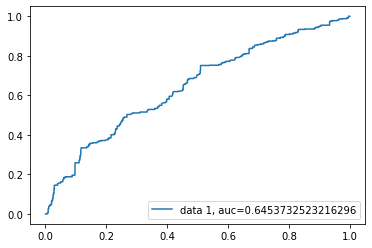

0.6453732523216296
Classification report:
               precision    recall  f1-score   support

           0       0.72      0.98      0.83      5612
           1       0.49      0.05      0.09      2208

    accuracy                           0.72      7820
   macro avg       0.61      0.51      0.46      7820
weighted avg       0.66      0.72      0.62      7820

Confusion matrix:
 [[5498  114]
 [2098  110]]


In [102]:
model = LogisticRegression()
pca_model_results(x,y,model,3)

model(x,y,m,0.2)

PCA Explained Variance ratio:  [0.51876605 0.4741377  0.00466141]


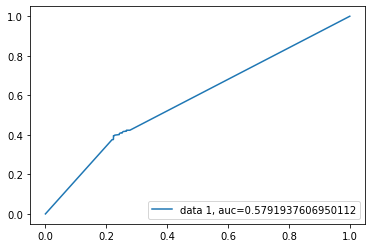

0.5791937606950112
Classification report:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75      5680
           1       0.37      0.41      0.39      2140

    accuracy                           0.64      7820
   macro avg       0.57      0.57      0.57      7820
weighted avg       0.66      0.64      0.65      7820

Confusion matrix:
 [[4165 1515]
 [1266  874]]


In [103]:
model = DecisionTreeClassifier()
pca_model_results(x,y,model,3)  

PCA Explained Variance ratio:  [0.52197716 0.47104086 0.00458257]


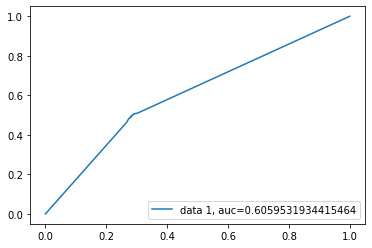

0.6059531934415464
Classification report:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78      5641
           1       0.43      0.46      0.45      2179

    accuracy                           0.68      7820
   macro avg       0.61      0.61      0.61      7820
weighted avg       0.69      0.68      0.68      7820

Confusion matrix:
 [[4334 1307]
 [1181  998]]


In [104]:
m = GaussianNB()
pca_model_results(x,y,model,3) 

In [105]:
def model(x,y,model,ts):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=ts)
    
    model.fit(x_train, y_train)
    
    y_predicted = model.predict(x_test)
    
    model.fit(x_train, y_train)
    
    probs = model.predict_proba(x_test)
    
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()
    
    print(roc_auc_score(y_test,probs[:,1]))
    
    print('Classification report:\n', classification_report(y_test, y_predicted))
    
    conf_mat = confusion_matrix(y_true=y_test, y_pred=y_predicted)
    
    print('Confusion matrix:\n', conf_mat)
    
    print(f'Accuracy Score:\n{accuracy_score(y_test, y_predicted):0.5f}')

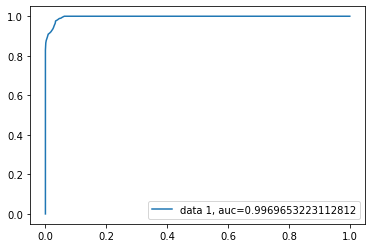

0.9969653223112812
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      5618
           1       0.94      0.94      0.94      2202

    accuracy                           0.96      7820
   macro avg       0.96      0.96      0.96      7820
weighted avg       0.96      0.96      0.96      7820

Confusion matrix:
 [[5482  136]
 [ 143 2059]]
Accuracy Score:
0.96432


In [106]:
m = DecisionTreeClassifier()
model(x,y,m,0.2)